# Fitting all Ne line positions, to get correction factor as function of spectral positoin
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- You can install DiadFit through PyPI, simply uncomment this line. You only need to run this once per computer (until you want to get an upgraded version)

In [1]:
#!pip install DiadFit --upgrade 

## Now import the packages you need
- When you communicate bugs with Penny, make sure you specify the version here.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.58'

##  Specifying paths
- Put your path here, e.g. where in your computer the spectra and metadata are saved

In [44]:
import os
DayFolder=os.getcwd()
spectra_path=DayFolder + '/Spectra'
meta_path=DayFolder + '/Metadata'
filetype='headless_txt'

In [4]:
Ne_files=pf.get_files(path=spectra_path,
file_ext='txt', ID_str='N', 
exclude_str=['diad'], sort=False)

Ne_files[0:5]

['Ne1.txt', 'Ne10.txt', 'Ne11.txt', 'Ne12.txt', 'Ne13.txt']

In [5]:
filename=Ne_files[0]

In [6]:
files=pf.get_data(path=spectra_path,
                       filename=filename, filetype='headless_txt')
#test=np.column_stack((files[:, 0], files[:, 1]))

In [7]:
files

array([[1057.815782,  724.333313],
       [1058.382733,  722.333313],
       [1058.949625,  734.      ],
       ...,
       [1606.68753 ,  774.      ],
       [1607.196482,  768.666687],
       [1607.70538 ,  774.333313]])

### Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [8]:
wavelength =531.885 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, 
cut_off_intensity=1499)
df_Ne

,Raman_shift (cm-1),Intensity,Ne emission line in air
0,823.339784,1500.0,556.24416
1,824.388824,5000.0,556.27662
9,1122.776289,5000.0,565.66588
13,1225.796764,1500.0,568.98163
15,1315.114705,1500.0,571.88798
16,1316.169507,5000.0,571.92248
19,1404.604434,5000.0,574.82985
23,1453.253923,7000.0,576.44188
26,1572.894280,5000.0,580.44496
27,1593.518603,3000.0,581.14066


### Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for each selected line

In [9]:
line_1117=1117
line_1447=1447
ideal_split_1117_1447=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1117, line2_shift=line_1447,
cut_off_intensity=2000)
ideal_split_1117_1447

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477634,1122.776289,1453.253923,1117,1447


In [10]:
line_1220=1220
line_1310=1310
ideal_split_1220_1310=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1220, line2_shift=line_1310,
cut_off_intensity=1400)
ideal_split_1220_1310

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,89.31794,1225.796764,1315.114705,1220,1310


In [11]:
line_1400=1400
line_1567=1567
ideal_split_1400_1567=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1400, line2_shift=line_1567,
cut_off_intensity=2000)
ideal_split_1400_1567

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,168.289845,1404.604434,1572.89428,1400,1567


## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook
- This also prints the heights of the other peaks so you could choose other Neons if you wanted to

,Peak1_cent,Peak1_height,Peak2_cent,Peak2_height,Peak1_prom,Peak2_prom
0,1123.748842,1590.666626,1453.623079,13790.0,880.999939,13080.333313


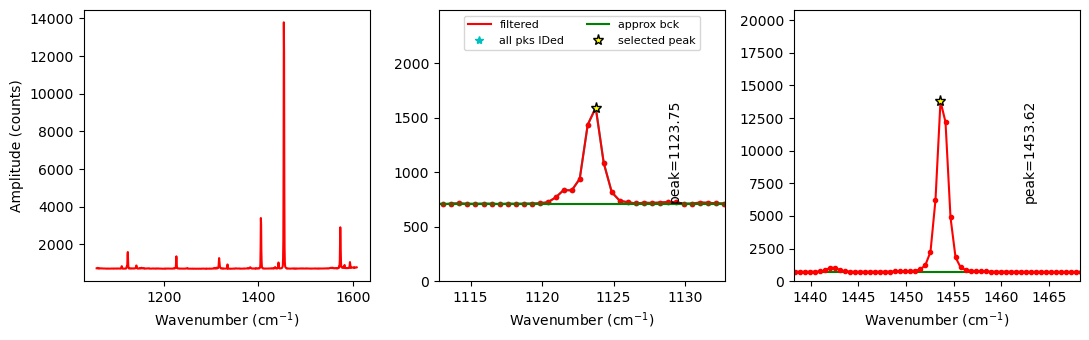

In [12]:
Neon_id_config_1117_1447=pf.Neon_id_config(height=10,  distance=1, prominence=10, 
            width=1, threshold=0.6, 
            peak1_cent=ideal_split_1117_1447['Line_1'].iloc[0],
            peak2_cent=ideal_split_1117_1447['Line_2'].iloc[0], n_peaks=6)
Neon_id_config_1117_1447

Ne_1117_1447, df_fit_params_1117_1447=pf.identify_Ne_lines(path=spectra_path,
filename=filename, filetype=filetype,
config=Neon_id_config_1117_1447, print_df=False)
df_fit_params_1117_1447

,Peak1_cent,Peak1_height,Peak2_cent,Peak2_height,Peak1_prom,Peak2_prom
0,1226.367506,1362.0,1316.763365,1268.666626,644.0,550.666626


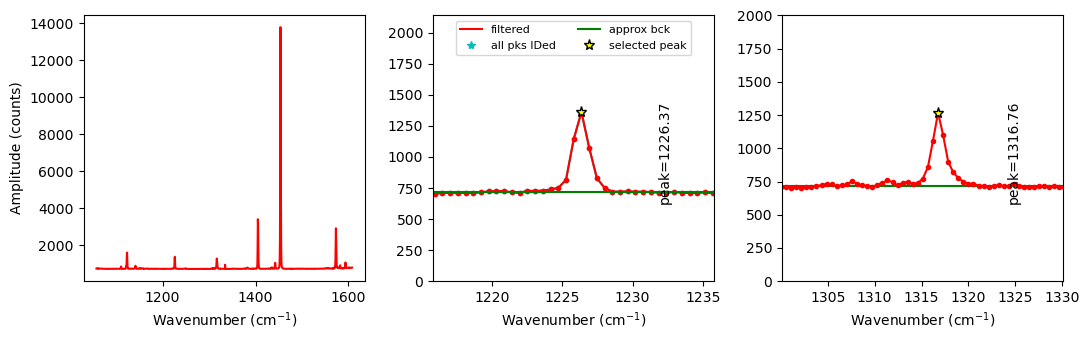

In [13]:
Neon_id_config_1220_1310=pf.Neon_id_config(height=10,  distance=1, prominence=10, 
            width=1, threshold=0.6, 
            peak1_cent=ideal_split_1220_1310['Line_1'].iloc[0],
            peak2_cent=ideal_split_1220_1310['Line_2'].iloc[0], n_peaks=6)
Neon_id_config_1220_1310

Ne_1220_1310, df_fit_params_1220_1310=pf.identify_Ne_lines(path=spectra_path,
filename=filename, filetype=filetype,
config=Neon_id_config_1220_1310, print_df=False)
df_fit_params_1220_1310

,Peak1_cent,Peak1_height,Peak2_cent,Peak2_height,Peak1_prom,Peak2_prom
0,1405.058196,3395.666748,1572.975993,2904.0,2676.000061,2184.333313


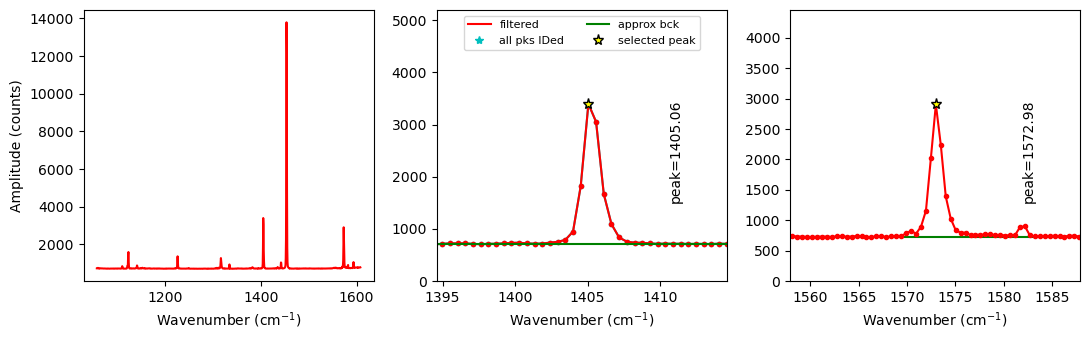

In [14]:
Neon_id_config_1400_1567=pf.Neon_id_config(height=10,  distance=1, prominence=10, 
            width=1, threshold=0.6, 
            peak1_cent=ideal_split_1400_1567['Line_1'].iloc[0],
            peak2_cent=ideal_split_1400_1567['Line_2'].iloc[0], n_peaks=6)
Neon_id_config_1400_1567

Ne_1400_1567, df_fit_params_1400_1567=pf.identify_Ne_lines(path=spectra_path,
filename=filename, filetype=filetype,
config=Neon_id_config_1400_1567, print_df=False)
df_fit_params_1400_1567

### Tweak peak parameters
- One important thing is the background positions, these are defined relative to the peak position. Once you tweak them for each instrument, you chould be good to go. 
- Another thing is how many peaks you want for Peak1, 'peaks_1', for the 1117 line, you'll need 2 if you have the clear secondary peak seen above. 

## 1117-1447 fitting

,filename,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,test,1453.824138,21207.70563,0.620331,None,0.00225,0.373892,1123.568549,1446.804932,0.628985,None,NaN,0.407646,330.255589,1.000672,NaN,NaN,41.666064,6.136637,47.802701


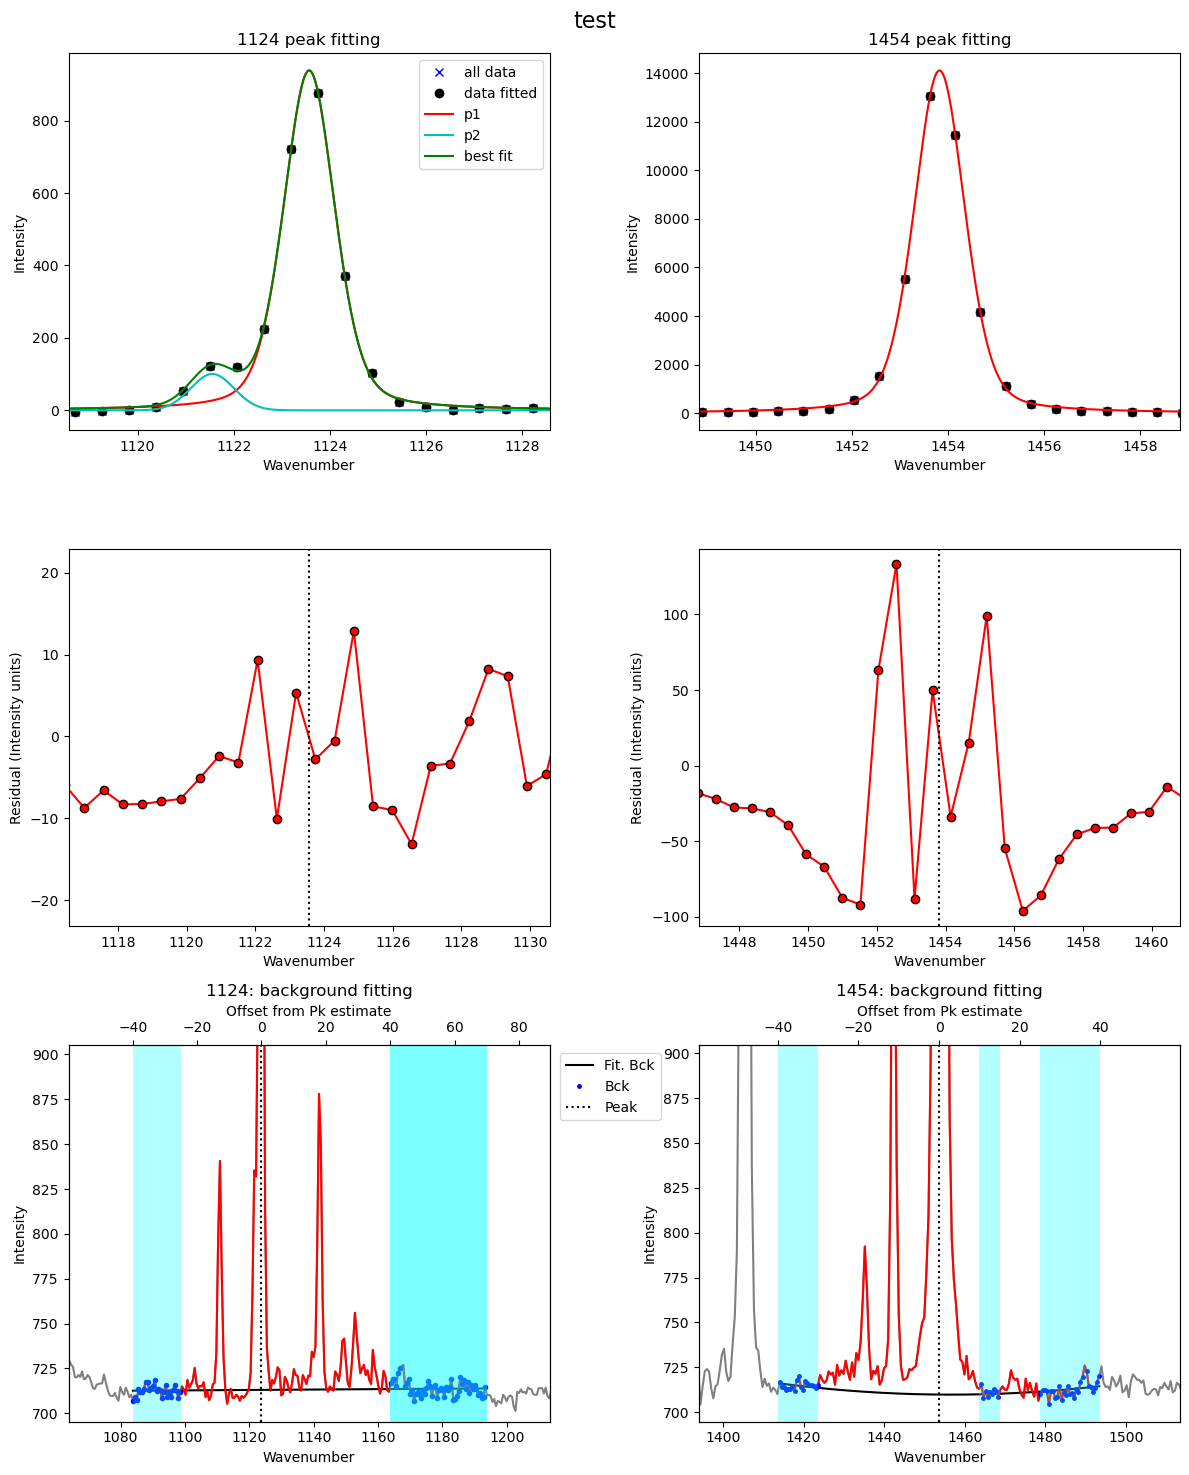

In [15]:
model_name='PseudoVoigtModel'
Ne_Config_est_1117_1447=pf.Ne_peak_config(model_name=model_name,
 DeltaNe_ideal=ideal_split_1117_1447['Ne_Split'], peaks_1=2, LH_offset_mini=[2, 5],
pk1_sigma=0.6, pk2_sigma=0.5,
lower_bck_pk1=(-40, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=5, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10],
N_poly_pk2_baseline=2 )
i=0
df_test_params=pf.fit_Ne_lines(Ne=Ne_1117_1447, filename='test',
path=spectra_path, prefix=False,
config=Ne_Config_est_1117_1447,
    Ne_center_1=df_fit_params_1117_1447['Peak1_cent'].iloc[i], 
    Ne_center_2=df_fit_params_1117_1447['Peak2_cent'].iloc[i],
    Ne_prom_1=df_fit_params_1117_1447['Peak1_prom'].iloc[i],
    Ne_prom_2=df_fit_params_1117_1447['Peak2_prom'].iloc[i],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

In [16]:
df_fit_params_1220_1310['Peak2_cent']

0    1316.763365
Name: Peak2_cent, dtype: float64

,filename,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,test,1316.822125,1278.591949,0.736477,None,0.0206,0.95698,1226.326673,1088.879812,0.645208,None,0.00595,0.51124,90.495453,0.986988,0.986699,0.987278,10.773458,5.795775,16.569233


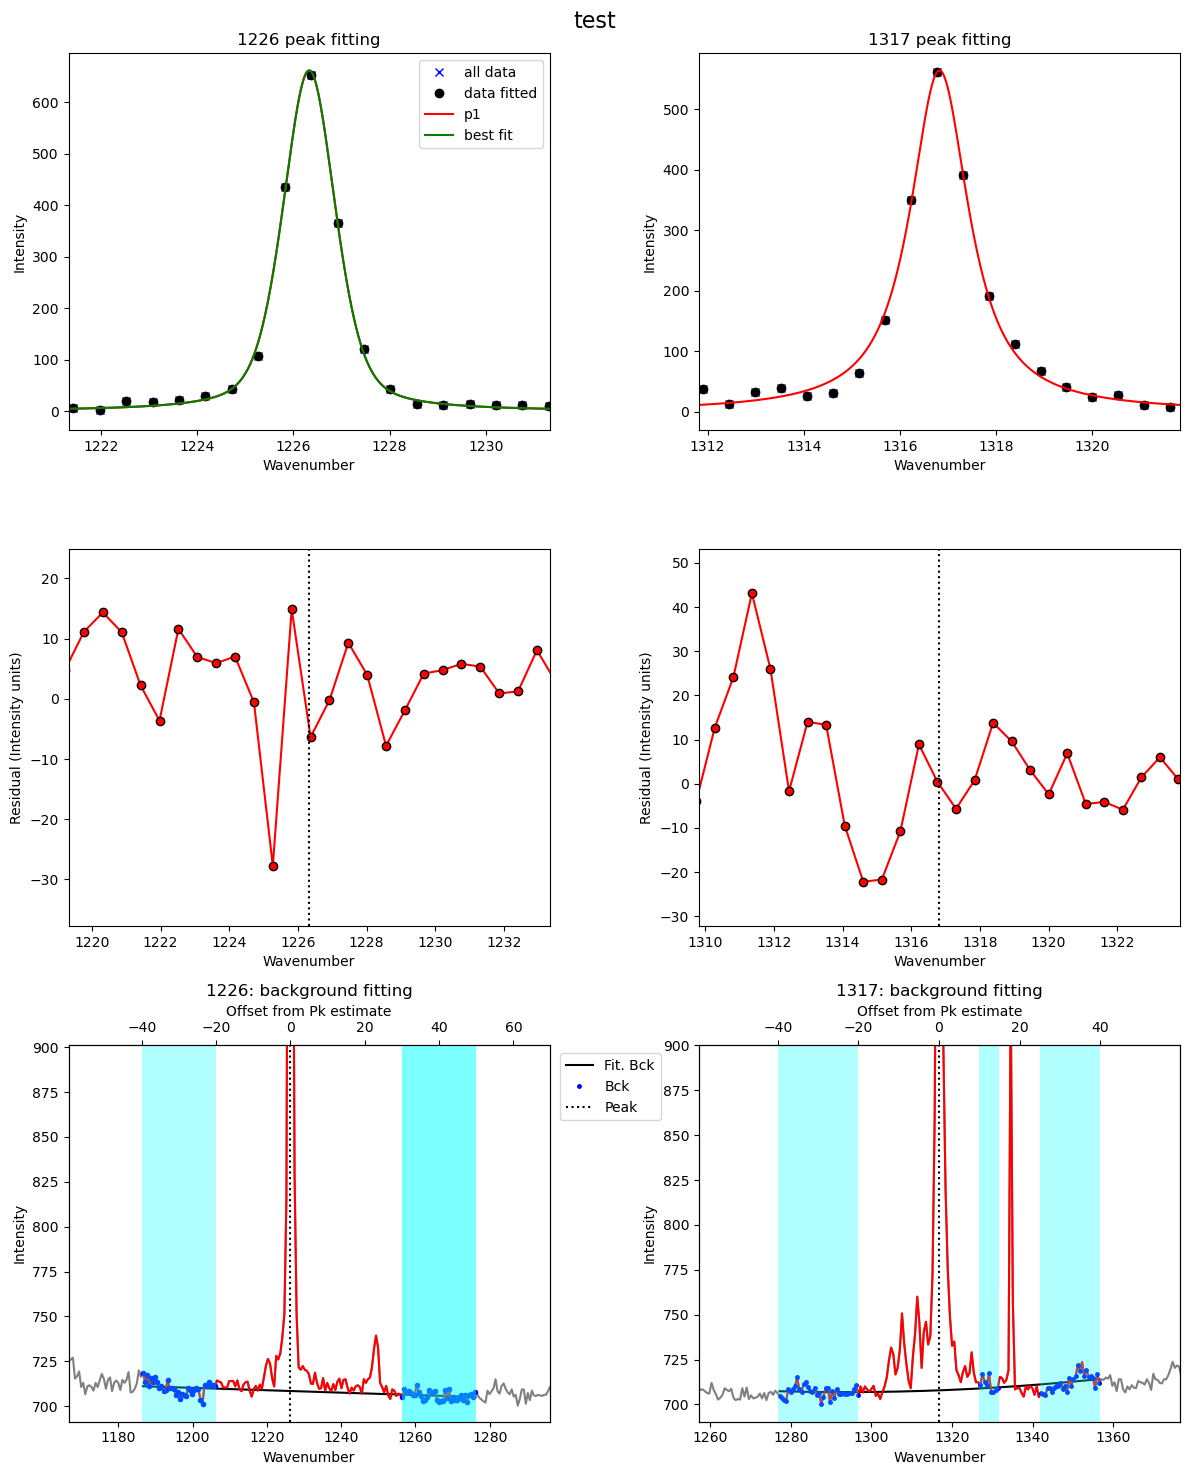

In [17]:
model_name='PseudoVoigtModel'
Ne_Config_est_1220_1310=pf.Ne_peak_config(model_name=model_name,
 DeltaNe_ideal=ideal_split_1220_1310['Ne_Split'], peaks_1=1, LH_offset_mini=[2, 5],
pk1_sigma=0.6, pk2_sigma=0.5,
lower_bck_pk1=(-40, -20), upper_bck1_pk1=[30, 50], upper_bck2_pk1=[30, 50],
lower_bck_pk2=[-40, -20], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=5, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10],
N_poly_pk2_baseline=2 )
i=0
df_test_params=pf.fit_Ne_lines(Ne=Ne_1220_1310, filename='test',
path=spectra_path, prefix=False,
config=Ne_Config_est_1220_1310,
    Ne_center_1=df_fit_params_1220_1310['Peak1_cent'].iloc[i], 
    Ne_center_2=df_fit_params_1220_1310['Peak2_cent'].iloc[i],
    Ne_prom_1=df_fit_params_1220_1310['Peak1_prom'].iloc[i],
    Ne_prom_2=df_fit_params_1220_1310['Peak2_prom'].iloc[i],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

## 1400-1567

,filename,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,test,1573.039966,3849.394169,0.66879,None,0.0124,0.607719,1405.277131,4502.220313,0.635907,None,0.00501,0.419613,167.762835,1.003141,1.003037,1.003246,24.135206,22.657424,46.79263


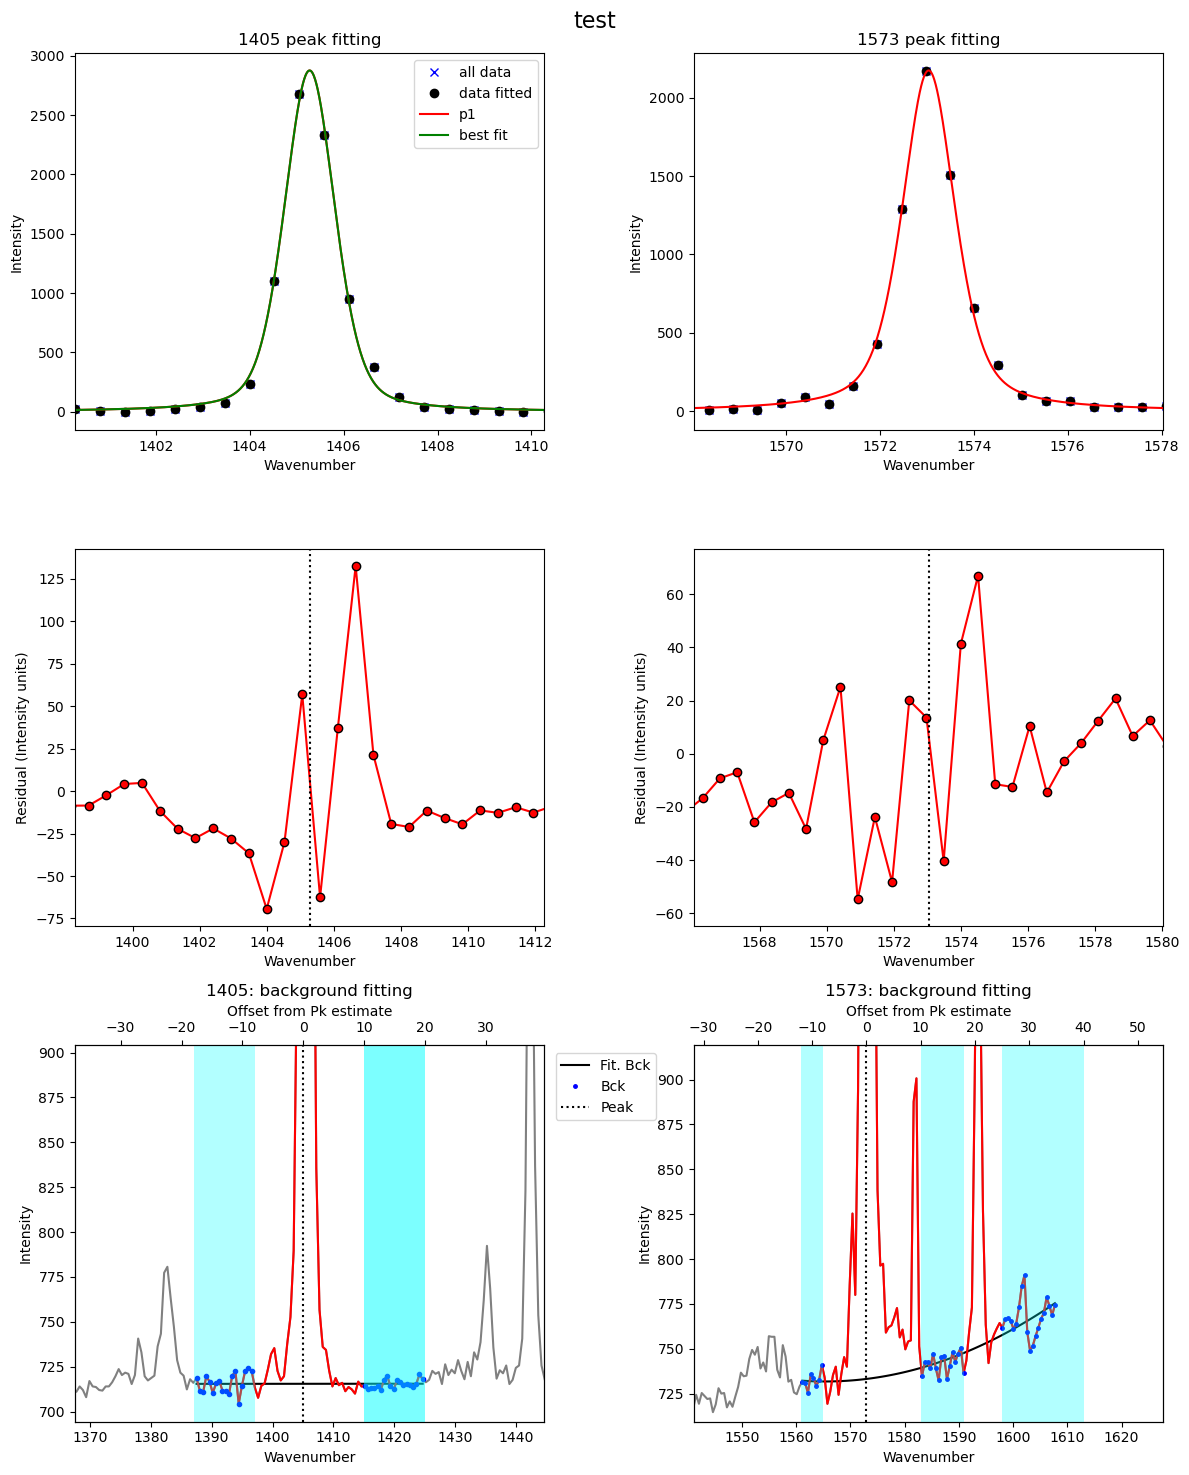

In [18]:
model_name='PseudoVoigtModel'
Ne_Config_est_1400_1567=pf.Ne_peak_config(model_name=model_name,
 DeltaNe_ideal=ideal_split_1400_1567['Ne_Split'], peaks_1=1, LH_offset_mini=[2, 5],
pk1_sigma=0.6, pk2_sigma=0.5,
lower_bck_pk1=(-18, -8), upper_bck1_pk1=[10, 20], upper_bck2_pk1=[10, 20],
lower_bck_pk2=[-12, -8], upper_bck1_pk2=[10, 18], upper_bck2_pk2=[25, 40],
x_range_peak=5, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10],
N_poly_pk2_baseline=2 )
i=0
df_test_params=pf.fit_Ne_lines(Ne=Ne_1400_1567, filename='test',
path=spectra_path, prefix=False,
config=Ne_Config_est_1400_1567,
    Ne_center_1=df_fit_params_1400_1567['Peak1_cent'].iloc[i], 
    Ne_center_2=df_fit_params_1400_1567['Peak2_cent'].iloc[i],
    Ne_prom_1=df_fit_params_1400_1567['Peak1_prom'].iloc[i],
    Ne_prom_2=df_fit_params_1400_1567['Peak2_prom'].iloc[i],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

In [19]:
df2_1117_1447=pf.loop_Ne_lines(files=Ne_files, 
spectra_path=spectra_path, 
filetype='headless_txt', config_ID_peaks=Neon_id_config_1117_1447, 
config=Ne_Config_est_1117_1447,
df_fit_params=df_fit_params_1117_1447,                    
plot_figure=False, single_acq=False)

  0%|          | 0/77 [00:00<?, ?it/s]

In [35]:
df2_1220_1310=pf.loop_Ne_lines(files=Ne_files, 
spectra_path=spectra_path, 
filetype='headless_txt', config_ID_peaks=Neon_id_config_1220_1310, 
config=Ne_Config_est_1220_1310,
df_fit_params=df_fit_params_1220_1310,                    
plot_figure=False, single_acq=False)

  0%|          | 0/77 [00:00<?, ?it/s]

In [21]:
df2_1400_1567=pf.loop_Ne_lines(files=Ne_files, 
spectra_path=spectra_path, 
filetype='headless_txt', config_ID_peaks=Neon_id_config_1400_1567, 
config=Ne_Config_est_1400_1567,
df_fit_params=df_fit_params_1400_1567,                    
plot_figure=False, single_acq=False)

  0%|          | 0/77 [00:00<?, ?it/s]

In [22]:
## Ideal positions
Ideal_1117=ideal_split_1117_1447['Line_1']
Ideal_1447=ideal_split_1117_1447['Line_2']
Ideal_1220=ideal_split_1220_1310['Line_1']
Ideal_1310=ideal_split_1220_1310['Line_2']
Ideal_1400=ideal_split_1400_1567['Line_1']
#Ideal_1567=ideal_split_1400_1567['Line_2']

In [45]:
## Metadata
## Get meta files
Ne_files_meta=pf.get_files(path=meta_path,
file_ext='txt', ID_str='N', 
exclude_str=['diad'], sort=False)

Ne_files_meta[0:5]

meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=Ne_files_meta, prefix=False)
meta.head()

100%|██████████| 77/77 [00:03<00:00, 23.96it/s]

Done
Oof, try not to work after midnight!


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
64,NE68.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:07:01 AM\n,86821.0,1341.0
65,NE69.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:14:20 AM\n,87260.0,1341.0
67,NE70.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:21:12 AM\n,87672.0,1341.0
68,NE71.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:36:29 AM\n,88589.0,1341.0
69,NE72.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:44:10 AM\n,89050.0,1341.0


In [48]:
df_combo_1220_1310=df2_1220_1310.merge(meta, on='filename')
df_combo_1400_1567=df2_1400_1567.merge(meta, on='filename')
df_combo_1117_1447=df2_1117_1447.merge(meta, on='filename')




In [52]:
df2_1220_1310.columns

Index(['filename', 'Ne_Corr', 'deltaNe', 'pk2_peak_cent', 'pk1_peak_cent',
       'pk2_amplitude', 'pk1_amplitude', 'residual_pk2', 'residual_pk1',
       'pk2_sigma', 'pk2_gamma', 'error_pk2', 'Peak2_Prop_Lor', 'pk1_sigma',
       'pk1_gamma', 'error_pk1', 'Peak1_Prop_Lor', 'Ne_Corr_min',
       'Ne_Corr_max', 'residual_pk1+pk2'],
      dtype='object')

## Lets filer these

In [63]:
a=(MAX_Corr_factor_1310+Min_Corr_factor_1310)/2
a.unique()

array([3.09437738e-05, 3.32988805e-05, 3.04159425e-05, 3.26908617e-05,
       3.32214214e-05, 3.20840965e-05, 2.95814505e-05, 2.94297410e-05,
       3.10226595e-05, 3.26895363e-05, 3.21595042e-05, 2.82125552e-05,
       3.08729953e-05, 2.92793377e-05, 2.73076942e-05, 3.05694938e-05,
       2.91281040e-05, 3.01142954e-05, 2.98872013e-05, 2.92034888e-05,
       3.18581441e-05, 3.05696073e-05, 3.11713050e-05, 3.04934592e-05,
       3.01143223e-05, 2.95826944e-05, 3.14032500e-05, 2.93546656e-05,
       3.05695625e-05, 2.95835246e-05, 3.10246983e-05, 3.05695886e-05,
       3.05701389e-05, 3.06401504e-05, 3.24658806e-05, 3.40578511e-05,
       3.07963675e-05, 3.07206545e-05, 3.08720475e-05, 3.24663313e-05,
       2.89006719e-05, 3.18592458e-05, 3.17069507e-05, 2.95076744e-05,
       3.13225305e-05, 3.01132817e-05, 3.25417752e-05, 3.07967808e-05,
       3.03409119e-05, 2.86727454e-05, 2.91281231e-05, 2.99618257e-05,
                  nan, 2.99617425e-05, 3.02618650e-05, 2.86730639e-05,
      

Text(0.5, 0, 'Time (s)')

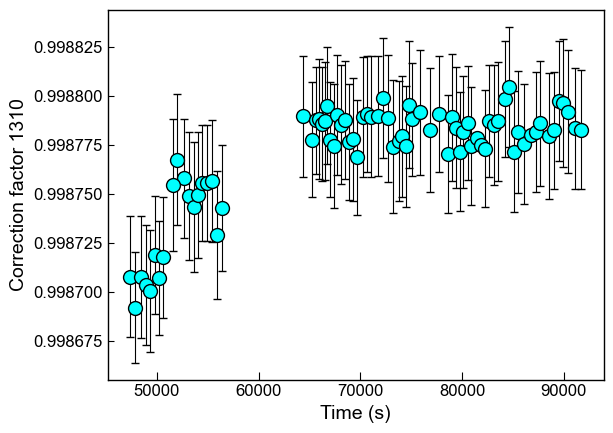

In [69]:
Corr_factor_1310=Ideal_1310.values/df_combo_1220_1310['pk2_peak_cent']
MAX_Corr_factor_1310=(Ideal_1310.values/(df_combo_1220_1310['pk2_peak_cent']-df_combo_1220_1310['error_pk2']))-Corr_factor_1310
Min_Corr_factor_1310=Corr_factor_1310-(Ideal_1310.values/(df_combo_1220_1310['pk2_peak_cent']+df_combo_1220_1310['error_pk2']))

df2_1310_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1310, number_av=6, offset=0.0009)

plt.plot(df_combo_1220_1310['sec since midnight'], Corr_factor_1310, '.k')
#plt.plot(df_combo_1220_1310['sec since midnight'], MAX_Corr_factor_1310, '+r')

err=(MAX_Corr_factor_1310+Min_Corr_factor_1310)/2
plt.errorbar(df_combo_1220_1310['sec since midnight'], Corr_factor_1310,
              xerr=0, yerr=err.fillna(0),
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=3)

plt.ylabel('Correction factor 1310')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

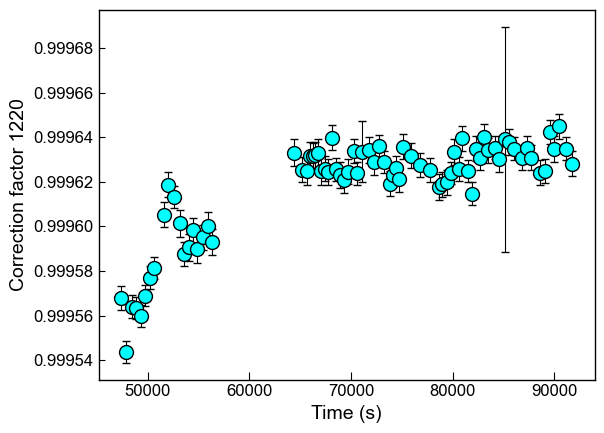

In [72]:
Corr_factor_1310=Ideal_1220.values/df_combo_1220_1310['pk1_peak_cent']
MAX_Corr_factor_1310=(Ideal_1310.values/(df_combo_1220_1310['pk1_peak_cent']-df_combo_1220_1310['error_pk1']))-Corr_factor_1310
Min_Corr_factor_1310=Corr_factor_1310-(Ideal_1310.values/(df_combo_1220_1310['pk1_peak_cent']+df_combo_1220_1310['error_pk1']))

df2_1310_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1310, number_av=6, offset=0.0009)

plt.plot(df_combo_1220_1310['sec since midnight'], Corr_factor_1310, '.k')
#plt.plot(df_combo_1220_1310['sec since midnight'], MAX_Corr_factor_1310, '+r')

err=(MAX_Corr_factor_1310+Min_Corr_factor_1310)/2
plt.errorbar(df_combo_1220_1310['sec since midnight'], Corr_factor_1310,
              xerr=0, yerr=err.fillna(0),
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=3)
plt.ticklabel_format(useOffset=False)
plt.ylabel('Correction factor 1220')
plt.xlabel('Time (s)')

In [84]:
df_combo_1220_1310_sorted['date']

0     November 28, 2020\n
11    November 28, 2020\n
22    November 28, 2020\n
33    November 28, 2020\n
44    November 28, 2020\n
             ...         
70    November 29, 2020\n
71    November 29, 2020\n
72    November 29, 2020\n
73    November 29, 2020\n
74    November 29, 2020\n
Name: date, Length: 77, dtype: object

In [82]:
df_combo_1220_1310_sorted = df_combo_1220_1310.sort_values(by=['sec since midnight'])

print(df_combo_1220_1310_sorted['filename'])

0      Ne1.txt
11     Ne2.txt
22     Ne3.txt
33     Ne4.txt
44     Ne5.txt
        ...   
70    NE73.txt
71    NE74.txt
72    NE75.txt
73    NE76.txt
74    NE77.txt
Name: filename, Length: 77, dtype: object


Text(0.5, 0, 'Time (s)')

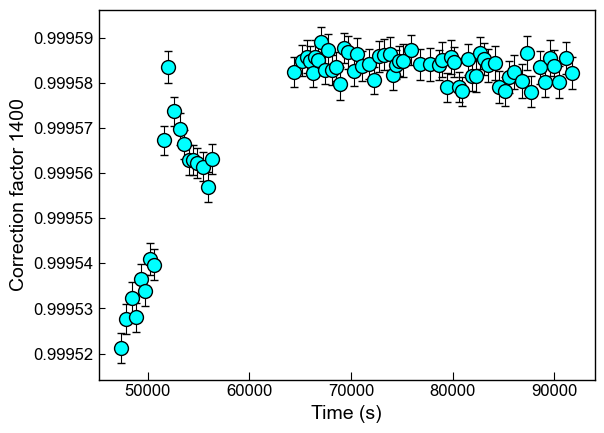

In [77]:
df2_combo_1400_1567=df_combo_1400_1567
Corr_factor_1310=Ideal_1400.values/df2_combo_1400_1567['pk1_peak_cent']
MAX_Corr_factor_1310=(Ideal_1310.values/(df2_combo_1400_1567['pk1_peak_cent']-df2_combo_1400_1567['error_pk1']))-Corr_factor_1310
Min_Corr_factor_1310=Corr_factor_1310-(Ideal_1310.values/(df2_combo_1400_1567['pk1_peak_cent']+df2_combo_1400_1567['error_pk1']))

df2_1310_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1310, number_av=6, offset=0.0009)

plt.plot(df2_combo_1400_1567['sec since midnight'], Corr_factor_1310, '.k')
#plt.plot(df2_combo_1400_1567['sec since midnight'], MAX_Corr_factor_1310, '+r')

err=(MAX_Corr_factor_1310+Min_Corr_factor_1310)/2
plt.errorbar(df2_combo_1400_1567['sec since midnight'], Corr_factor_1310,
              xerr=0, yerr=err.fillna(0),
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=3)
plt.ticklabel_format(useOffset=False)
plt.ylabel('Correction factor 1400')
plt.xlabel('Time (s)')

In [ ]:
ax1.errorbar(King2002['H2O_SIMS'], King2002['CO2_Tot_FTIR'], xerr=2*King2002['Err_H2O'], yerr=2*King2002['CO2_Err'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k')
plt.plot()

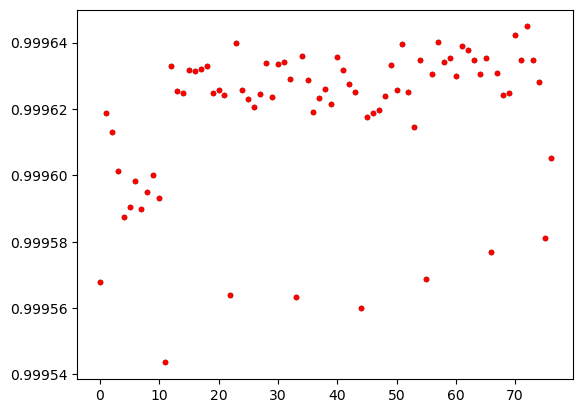

In [24]:
Corr_factor_1220=Ideal_1220.values/df2_1220_1310['pk1_peak_cent']

df2_1220_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1220, number_av=6, offset=0.0009)
plt.plot(df2_1220_1310.index,Corr_factor_1220, '.k')
plt.plot(df2_1220_filt.index, df2_1220_filt, '.r')

In [25]:
# Corr_factor_1567=Ideal_1567.values/df2_1400_1567['pk2_peak_cent']

# df2_1567_filt=pf.filter_Ne_Line_neighbours(
# Corr_factor=Corr_factor_1567, number_av=6, offset=0.00009)
# plt.plot(df2_1400_1567.index,Corr_factor_1567, '.k')
# plt.plot(df2_1567_filt.index, df2_1567_filt, '.r')



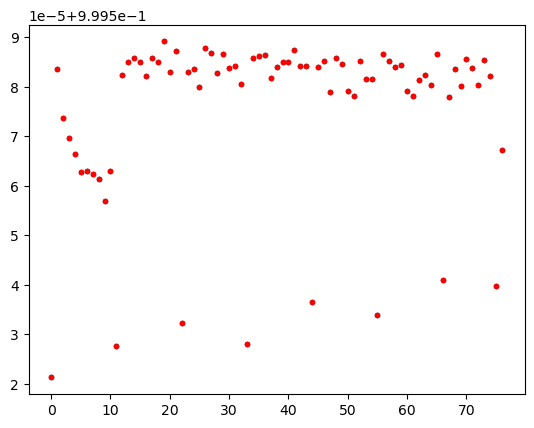

In [26]:
Corr_factor_1400=Ideal_1400.values/df2_1400_1567['pk1_peak_cent']

df2_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1400, number_av=6, offset=0.0009)
plt.plot(df2_1400_1567.index,Corr_factor_1400, '.k')
plt.plot(df2_1400_filt.index, df2_1400_filt, '.r')

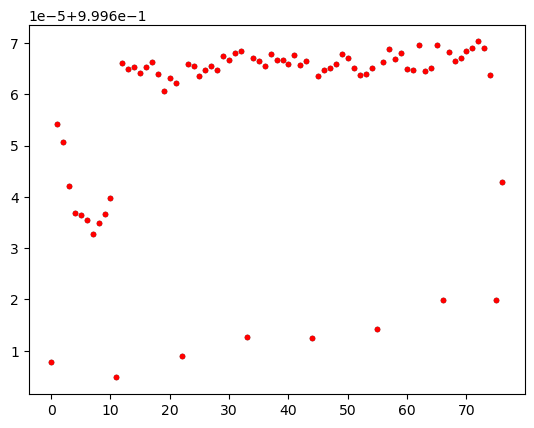

In [27]:
Corr_factor_1447=Ideal_1447.values/df2_1117_1447['pk2_peak_cent']

df2_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1447, number_av=6, offset=0.0009)
plt.plot(df2_1117_1447.index,Corr_factor_1447, '.k')
plt.plot(df2_1447_filt.index, df2_1447_filt, '.r')



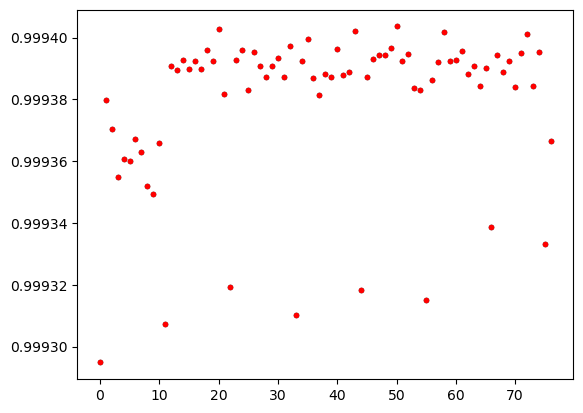

In [28]:
Corr_factor_1117=Ideal_1117.values/df2_1117_1447['pk1_peak_cent']

df2_1117_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1117, number_av=6, offset=0.0009)
plt.plot(df2_1117_1447.index,Corr_factor_1117, '.k')
plt.plot(df2_1117_filt.index, df2_1117_filt, '.r')

## Now make a dataframe for easy looping

In [29]:
corr_factor=pd.DataFrame(data={'1117_Corr': df2_1117_filt,
                               '1220_Corr': df2_1220_filt,
                              '1310_Corr': df2_1310_filt,
                              
                            '1400_Corr': df2_1400_filt,
                             
                              '1447_Corr': df2_1447_filt,
                                })
sumro=corr_factor.sum(axis=1)
#corr_factor_Filt=corr_factor[(sumro>3.9) & (sumro<4.1)]
corr_factor_Filt=corr_factor #[(sumro>5.9) & (sumro<6.1)]

corr_peaks=pd.DataFrame(data={
'1117_peak':Ideal_1117,
'1220_peak':Ideal_1220,
'1310_peak': Ideal_1310,   
'1400_peak': Ideal_1400,
'1447_peak':Ideal_1447})
 


In [30]:
corr_factor

,1117_Corr,1220_Corr,1310_Corr,1400_Corr,1447_Corr
0,0.999295,0.999568,0.998708,0.999521,0.999608
1,0.999380,0.999619,0.998767,0.999584,0.999654
2,0.999370,0.999613,0.998758,0.999574,0.999651
3,0.999355,0.999601,0.998749,0.999570,0.999642
4,0.999361,0.999588,0.998743,0.999566,0.999637
...,...,...,...,...,...
72,0.999401,0.999645,0.998792,0.999580,0.999670
73,0.999384,0.999635,0.998783,0.999585,0.999669
74,0.999395,0.999628,0.998783,0.999582,0.999664
75,0.999333,0.999581,0.998718,0.999540,0.999620


## Now working out ideal positions

In [31]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [32]:
ExampleDiad=pf.get_data(path=spectra_path,
        filename='POC44.txt', filetype='headless_txt')

1057.815782
1057.815782
1057.815782
1057.815782
1057.815782
1057.815782


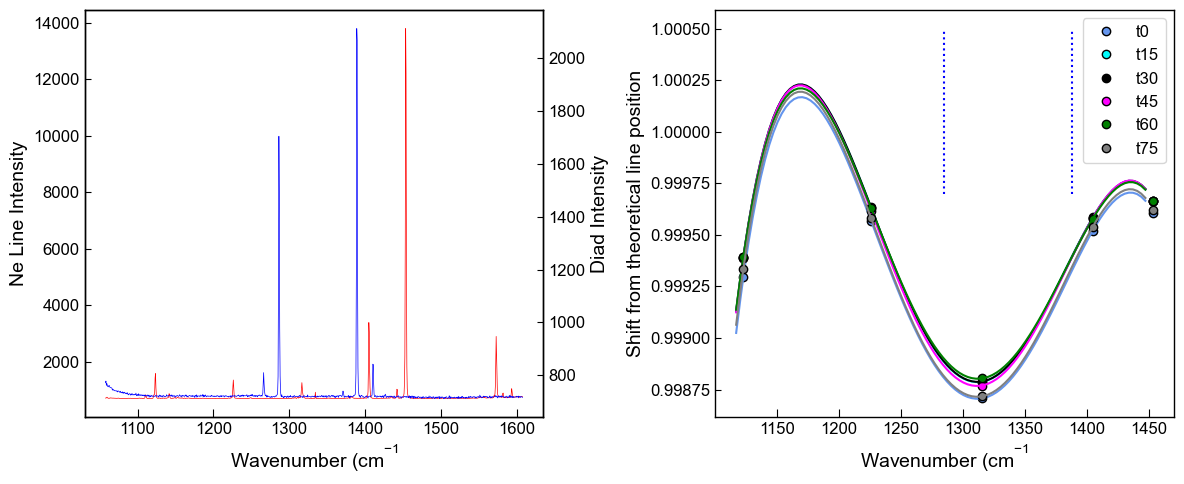

In [33]:
fig, ((ax0, ax1)) = plt.subplots(1,2, figsize = (12,5)) # adjust dimensions of figure here
# Where are the Neon lines?
ax0.plot(Ne_1400_1567[:, 0], Ne_1400_1567[:, 1], '-r', lw=0.5)
ax0b=ax0.twinx()
ax0b.plot(ExampleDiad[:, 0], ExampleDiad[:, 1], '-b', lw=0.5)
# How are the different lines drifting?
color=['red', 'cornflowerblue', 'cyan', 'black', 'magenta', 'green', 'grey']
n=0
diad1_pos=1284.33298631764
diad2_pos=1388.0707023396
ivals=[0, 15, 30, 45, 60, 75]


for i in ivals:
    n=n+1
    text='t'+str(i)
    NE0=pf.get_data(path=spectra_path,
        filename=Ne_files[i], filetype='headless_txt')
    NE0_minx=np.min(NE0[:, 0])
    print(NE0_minx)
    NE0_maxx=np.max(NE0[:, 0])

    x = np.array(corr_peaks.values)[0]
    y = corr_factor_Filt.iloc[i].values

    # Create a mask to filter out NaN values from y
    mask = ~np.isnan(y)
    x_filtered = x[mask]
    y_filtered=y[mask]

    # Perform polynomial fit with filtered data
    Pf = np.poly1d(np.polyfit(x_filtered, y_filtered, len(x_filtered)-1))

    Px = np.linspace(1117, 1447, 100)
    Py = Pf(Px)

    ax1.plot(x, y, 'ok', mfc=color[n], label=text)
    ax1.plot(Px, Py, '-', color=color[n])
    ax1.legend()
    
ax1.plot([diad1_pos, diad1_pos], 
         [0.9997, 1.0005], ':b')

ax1.plot([diad2_pos, diad2_pos], 
         [0.9997, 1.0005], ':b')
ax1.ticklabel_format(useOffset=False)
ax0.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_ylabel('Shift from theoretical line position')
ax0.set_ylabel('Ne Line Intensity')
ax0b.set_ylabel('Diad Intensity')

#ax2.plot(5, 5, 'ok')
#ax1.set_ylim([0.999, 1.001])

fig.tight_layout()
fig.savefig('Bakker_method.png', dpi=200)

In [34]:
df_ne=pd.read_excel('Sorted_Ne_lines.xlsx')
df_ne.head()

plt.plot(df_ne['Spectral Center'], corr_factor_Filt['1117_Corr'], 'ok')

FileNotFoundError: [Errno 2] No such file or directory: 'Sorted_Ne_lines.xlsx'

In [ ]:
corr_factor_Filt.columns

In [ ]:
df_ne=pd.read_excel('Sorted_Ne_lines.xlsx')
df_ne.head()

plt.plot(df_ne['Spectral Center'].iloc[10:15], corr_factor_Filt['1310_Corr'].iloc[10:15], 'ok')

In [ ]:
fig, ((ax1)) = plt.subplots(1,1, figsize = (12,5)) # adjust dimensions of figure here
# Where are the Neon lines?

# How are the different lines drifting?
color=['grey']
n=0
diad1_pos=1284.33298631764
diad2_pos=1388.0707023396
ivals=[0,]


for i in ivals:
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)

    ax1.plot(x, y, 'ok', mfc='grey', label=text)
    ax1.plot(Px, Py, '-', color='grey')
    ax1.legend()
    
ax1.plot([diad1_pos, diad1_pos], 
         [1.0004, 1.0012], ':b')

ax1.plot([diad2_pos, diad2_pos], 
         [1.0004, 1.0012], ':b')
ax1.ticklabel_format(useOffset=False)
ax0.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_ylabel('Shift from theoretical line position')
ax0.set_ylabel('Ne Line Intensity')
ax0b.set_ylabel('Diad Intensity')



fig.tight_layout()
fig.savefig('Bakker_method2.png', dpi=200)

In [ ]:
shift_1281=Pf(1281)
shift_1281

In [ ]:
shift_1287=Pf(1287)
shift_1287

In [ ]:
shift_1288=Pf(1288)
shift_1288

In [ ]:
shift_1386=Pf(1386)
shift_1386

In [ ]:
shift_1389=Pf(1389)
shift_1389

In [ ]:
# Say split of 104
1281+104==1385

In [ ]:
## 

In [ ]:
Pf(1385)*1385-Pf(1281)*1281

In [ ]:
Pf(1387)*1387-Pf(1283)*1283

In [ ]:
Pf(1389)*1389-Pf(1285)*1285

## Looping over all i

In [ ]:
# How are the different lines drifting?
color=['red', 'blue', 'cyan', 'black', 'magenta', 'green', 'grey']
n=0
diad1_pos=1284.33298631764
diad2_pos=1388.0707023396
#ivals=[0, 1, 2, 3, 4, 5, 10, 15, 20, 50, 100, 120]
corr_diad1=np.empty(len(corr_factor_Filt), dtype=float)
corr_diad2=np.empty(len(corr_factor_Filt), dtype=float)
xset=np.empty(len(corr_factor_Filt), dtype=float)

for i in range(0, len(corr_factor_Filt)):
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)
    corr_diad1[i]=Pf(diad1_pos)
    corr_diad2[i]=Pf(diad2_pos)
    xset[i]=i
    # ax1.plot(x, y, 'ok', mfc=color[n], label=text)
    # ax1.plot(Px, Py, '-', color=color[n])
    # ax1.legend()
    


In [ ]:
print('Measured split')
print(Split_original)

In [ ]:
Split_original=diad2_pos-diad1_pos
Split_after=diad2_pos*corr_diad2-diad1_pos*corr_diad1
Corr_Bakker=Split_after/Split_original

In [ ]:
Split_after[0]

In [ ]:
Split_original

## Calculating corrections

In [ ]:
Corr_1220_1400=((Ideal_1400[0]-Ideal_1220[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1400, number_av=6, offset=0.00009)

Corr_1220_1447=((Ideal_1447[0]-Ideal_1220[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1447, number_av=6, offset=0.00009)

Corr_1220_1567=((Ideal_1567[0]-Ideal_1220[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1567, number_av=6, offset=0.00009)

Corr_1117_1400=((Ideal_1400[0]-Ideal_1117[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1400, number_av=6, offset=0.00009)

Corr_1117_1447=((Ideal_1447[0]-Ideal_1117[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1447, number_av=6, offset=0.00009)

Corr_1117_1567=((Ideal_1567[0]-Ideal_1117[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1567, number_av=6, offset=0.00009)

Corr_1310_1400=((Ideal_1400[0]-Ideal_1310[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1400, number_av=6, offset=0.00009)

Corr_1310_1447=((Ideal_1447[0]-Ideal_1310[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1447, number_av=6, offset=0.00009)

Corr_1310_1567=((Ideal_1567[0]-Ideal_1310[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1567, number_av=6, offset=0.00009)

Corr_1400_1447=((Ideal_1447[0]-Ideal_1400[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1400[0]/df2_1400_filt)))
Corr_1400_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1400_1447, number_av=6, offset=0.00009)


## Typing out corrections for figure in paper

In [ ]:
## Using line segment method
Corr_1117_1567[0]*Split_original

In [ ]:
## Using line segment method
print(Corr_1400_1447[0])
print(Corr_1400_1447[0]*Split_original)

In [ ]:
## Using line segment method
print(Corr_1117_1447[0])
Corr_1117_1447[0]*Split_original

In [ ]:
## Using line segment method
print(Corr_1220_1400[0])
Corr_1220_1400[0]*Split_original

In [ ]:
## Using line segment method
print(Corr_1117_1400[0])
Corr_1117_1400[0]*Split_original

# Corr_Bakker[0]

In [ ]:
plt.plot(xset, Diad_Corr_Bakker-np.median(Diad_Corr_Bakker[0:10]), 'or')
plt.plot(Corr_1117_1447.index, Diad_Corr_Lam-np.median(Diad_Corr_Lam[0:10]), 'ok')

In [ ]:
df2_1220_1310['pk2_peak_cent'].head()

In [ ]:
Ideal_1310-Ideal_1400

In [ ]:
Corr_1117_1567

In [ ]:
plt.plot(Corr_1310_1567.index, 
         Corr_1310_1567/np.median(Corr_1310_1567[0:5]), '.', mfc='cornflowerblue', 
         mec='k', mew=0.3, label='1310-1567')
plt.plot(Corr_1310_1447.index, 
         Corr_1310_1447/np.median(Corr_1310_1447[0:5]), '.b', mec='k', mew=0.3, label='1310-1447')
plt.plot(Corr_1310_1400.index, 
         Corr_1310_1400/np.median(Corr_1310_1400[0:5]), '.k', mec='k', mew=0.3, label='1310-1400')

plt.plot(Corr_1220_1567.index, 
         Corr_1220_1567/np.median(Corr_1220_1567[0:5]), '.g', mec='k', mew=0.3, label='1220-1567')
plt.plot(Corr_1220_1447.index, 
         Corr_1220_1447/np.median(Corr_1220_1447[0:5]), '.', mfc='darkkhaki', mec='k', mew=0.3, label='1220-1447')
plt.plot(Corr_1220_1400.index, 
         Corr_1220_1400/np.median(Corr_1220_1400[0:5]), '.', mfc='palegreen',  mec='k', mew=0.3,label='1220-1400')


plt.plot(Corr_1117_1567.index, 
         Corr_1117_1567/np.median(Corr_1117_1567[0:5]), '.r', mec='k', mew=0.3, label='1117-1567')
plt.plot(Corr_1117_1447.index, 
         Corr_1117_1447/np.median(Corr_1117_1447[0:5]), '.', mfc='darkred', mec='k', mew=0.3, label='1117-1447')
plt.plot(Corr_1117_1400.index, 
         Corr_1117_1400/np.median(Corr_1117_1400[0:5]), '.', mfc='salmon',  mec='k', mew=0.3,label='1117-1400')

# plt.legend()

In [ ]:
plt.plot(Corr_1310_1567.index, 
         Corr_1310_1567, '.', mfc='cornflowerblue', 
         mec='k', mew=0.3, label='1310-1567')
plt.plot(Corr_1310_1447.index, 
         Corr_1310_1447, '.b', mec='k', mew=0.3, label='1310-1447')
plt.plot(Corr_1310_1400.index, 
         Corr_1310_1400, '.k', mec='k', mew=0.3, label='1310-1400')

plt.plot(Corr_1220_1567.index, 
         Corr_1220_1567, '.g', mec='k', mew=0.3, label='1220-1567')
plt.plot(Corr_1220_1447.index, 
         Corr_1220_1447, '.', mfc='darkkhaki', mec='k', mew=0.3, label='1220-1447')
plt.plot(Corr_1220_1400.index, 
         Corr_1220_1400, '.', mfc='palegreen',  mec='k', mew=0.3,label='1220-1400')


plt.plot(Corr_1117_1567.index, 
         Corr_1117_1567, '.r', mec='k', mew=0.3, label='1117-1567')
plt.plot(Corr_1117_1447.index, 
         Corr_1117_1447, '.', mfc='darkred', mec='k', mew=0.3, label='1117-1447')
plt.plot(Corr_1117_1400.index, 
         Corr_1117_1400, '.', mfc='salmon',  mec='k', mew=0.3,label='1117-1400')

plt.legend()

In [ ]:
Ne_1400_1567

In [ ]:
plt.plot(df2_1117_1447.index, df2_1117_1447['Ne_Corr'], '-r')
plt.plot(df2_1220_1310.index, df2_1220_1310['Ne_Corr'], '-b')

In [ ]:
df2_1117_1447.head()

## Now extract metadata to get a timestamp for each file

In [ ]:
## Get meta files
Ne_files_meta=pf.get_files(path=meta_path,
file_ext='txt', ID_str='N', 
exclude_str=['diad'], sort=False)

Ne_files_meta[0:5]

In [ ]:
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=Ne_files_meta, prefix=False)
meta.head()

In [ ]:
# Strip away suffix and prefix if needed
print(meta['filename'][0])

In [ ]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=None,
   file_type='.txt')
file_m

In [ ]:
# Do the same for spectra, e.g., work out what you need to strip off
print(df2['filename'][0])

In [ ]:
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=False, str_prefix=' ',
   file_type='.txt')
file_s

## Combine 2 dataframes
- Here we add a new column to each dataframe with these stripped back names, and then merge the 2 dataframes

In [ ]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect changes in Ne correction factor with time
- Normally, you can spot outliers this way

In [ ]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo_sort.to_excel('PseudoVoigt.xlsx')

In [ ]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')


In [ ]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo

In [ ]:
df_combo_sort.to_clipboard(excel=True)

## Exclude ones that don't look right...
- The filter_Ne_Line_neighbours excludes Ne lines that have a correction factor more than "offset" from their N neighbours (defined by "number_av")
- Tweak offset and number_av until you exclude the ones that dont look right

In [ ]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], 
                    number_av=5, offset=0.0002)
# Now lets plot this to see
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Kept')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Kept')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')


ax1.set_xlabel('Sec since midnight (s)')
ax1.set_ylabel('Ne Correction factor')
ax1.set_title('All measurements')
ax2.set_xlabel('Sec since midnight (s)')
ax2.set_title('Filtered measurements')
ax3.set_xlabel('Sec since midnight (s)')
ax3.set_ylabel('Density for split=' + str(test_split))
ax3.set_title('Test Density sensitivity')
fig.tight_layout()

## Now lets make a regression against time
- We take this time regression and then apply to our diad fits

In [ ]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=2, fit='poly')

## SAving as pickle, can then load as a pickle

In [ ]:
import pickle
with open('Ne_Line_Regression_Example_cali.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)